# Teoria

modello bioinspirato dalla biologia, ovvero dal cervello umano.

neuroni che si attivano insieme si legano insieme in reticoli chiamati reti neurali 

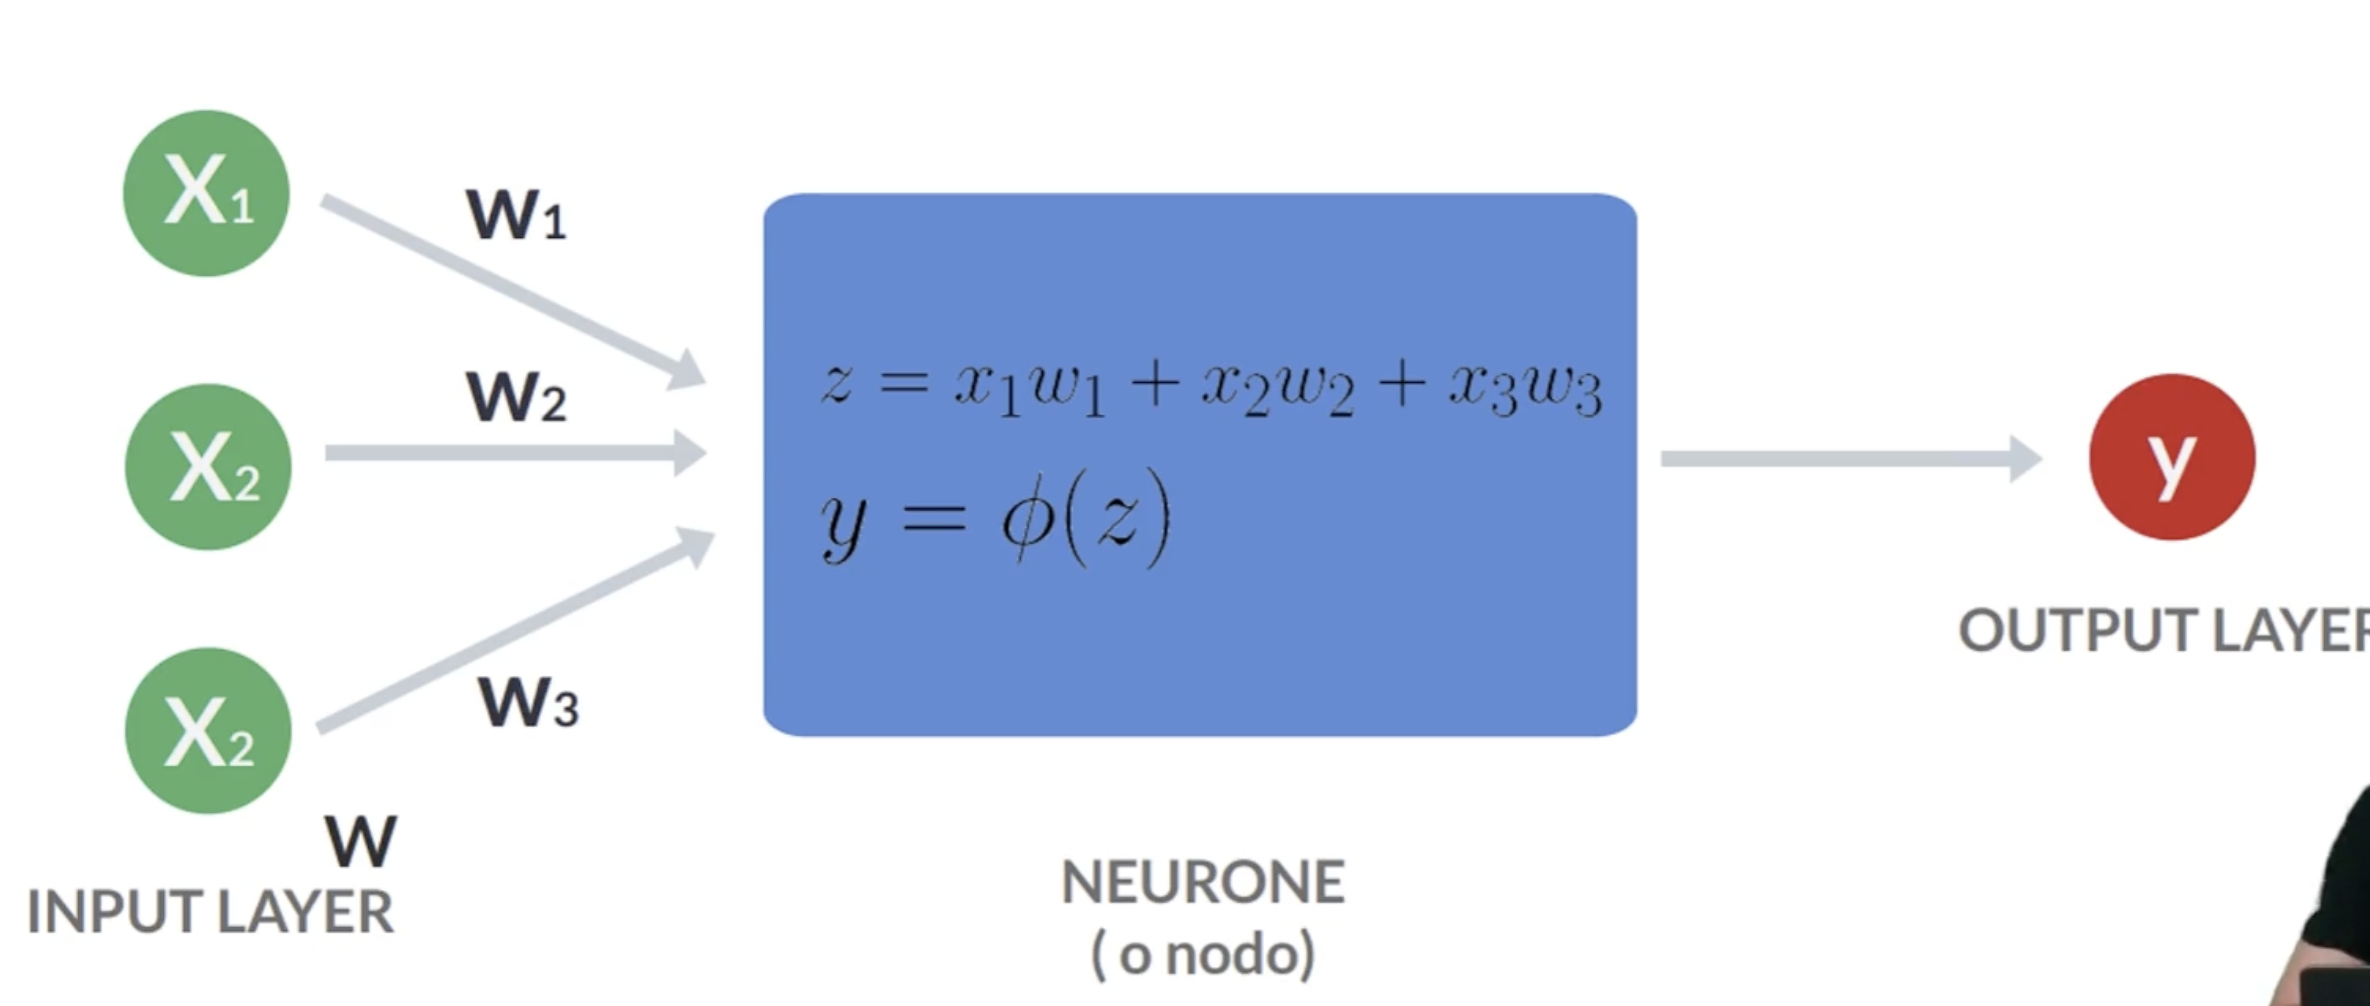

## funzioni di attivazione

permettono alla ANN di trovare relazioni non lineari tra i dati, ci consentono di definire come la somma pesata degli input viene trasformata in output


**step function**

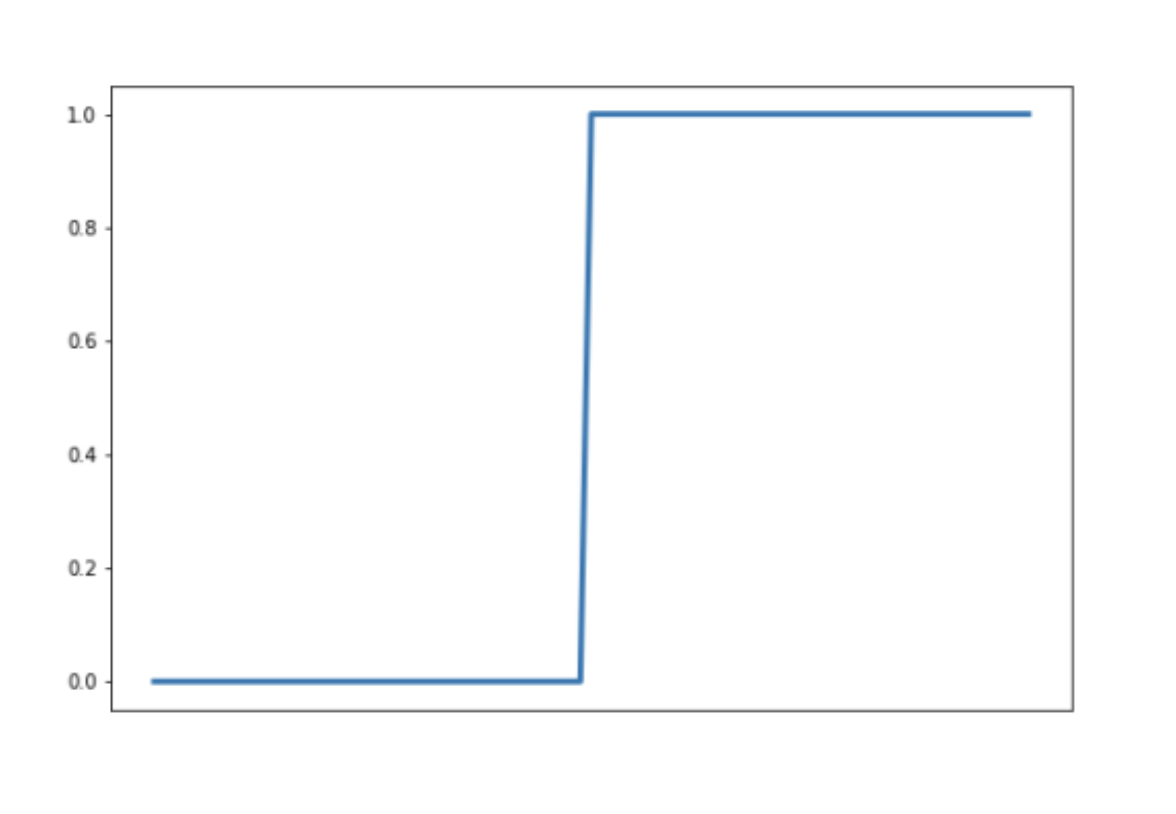

\begin{cases}
  z=x1w1+x2w2+x3w3 \\
       y = \phi(z) 
\end{cases}

può valere 1 o 0 in funzione del valore di z

**sigmoide**

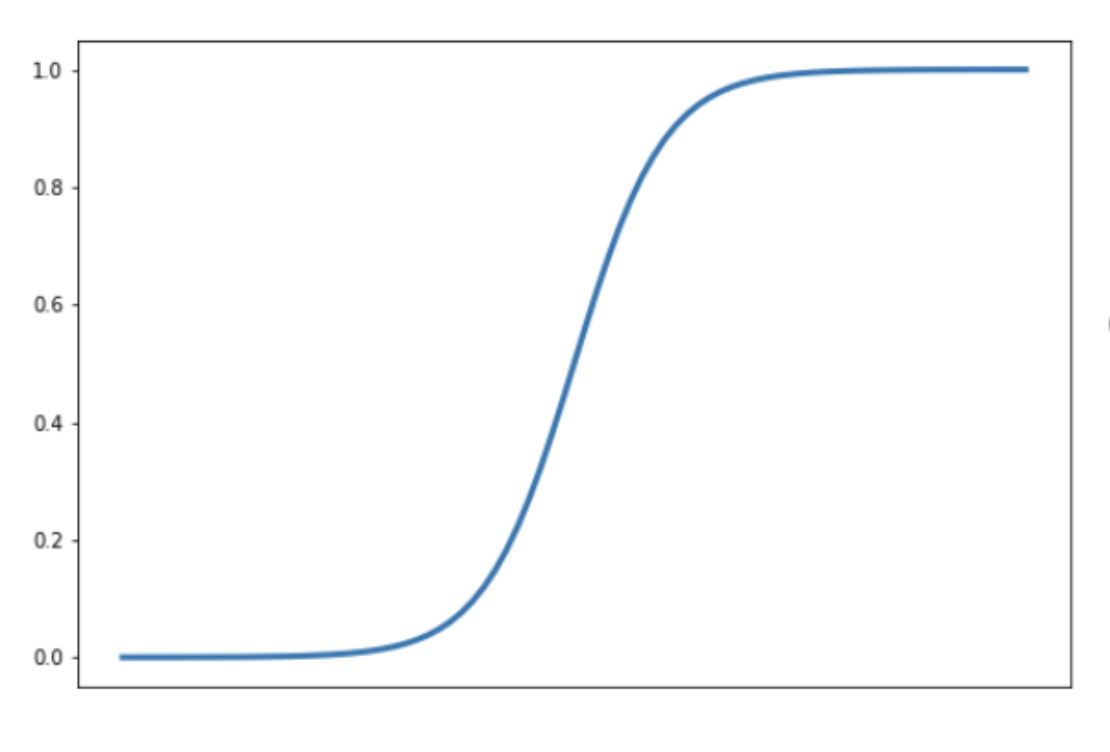

$\phi(x) = \frac{1}{1+e^{-z}}$ 

z va da $[-\infty,\infty]$ la sigmoide lo comprime tra 0 e 1 in forma di probabilità


**ReLu, rectified linear unit**

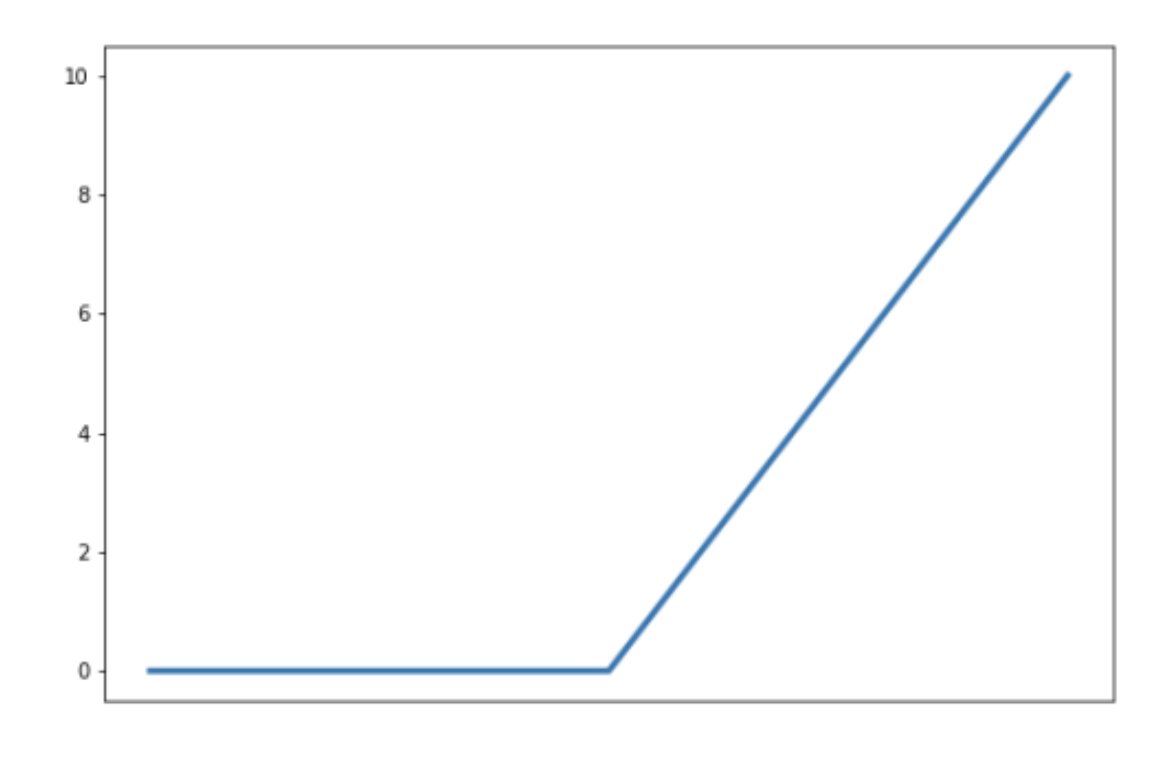

$\phi(z)=max(0,z)$

0 se z < 0 oppure valore di z (massimo tra 0 e z)

**tanh tangente iperbolica**

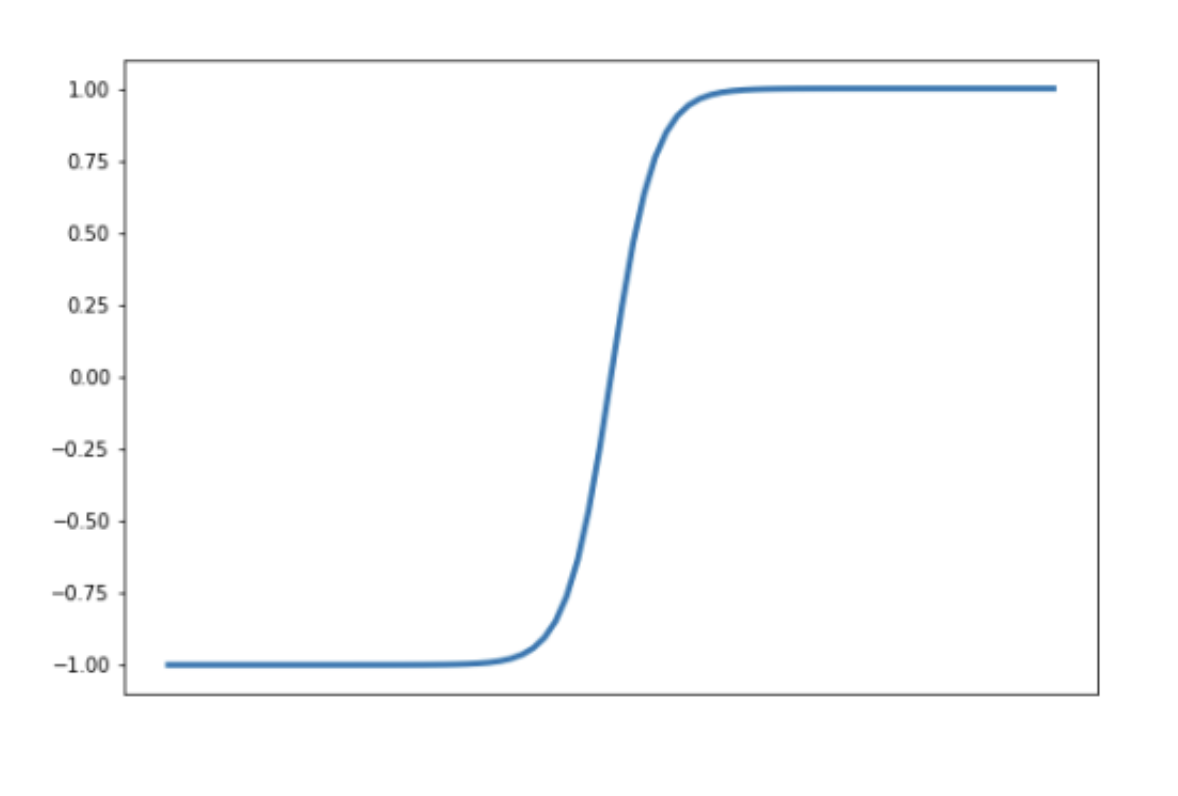

$\phi(z) = \frac{1-e^{-2z}}{1+e^{-2z}}$

comprime il range di valori da $[-1,1]$

tipicamente il percettrone usa la step function (quindi output tra 0 e 1 )

## Multilayer perceptron (percettrone multistrato)

chiamato anche vanilla neural network, esempio più comune di multilayer perceptron

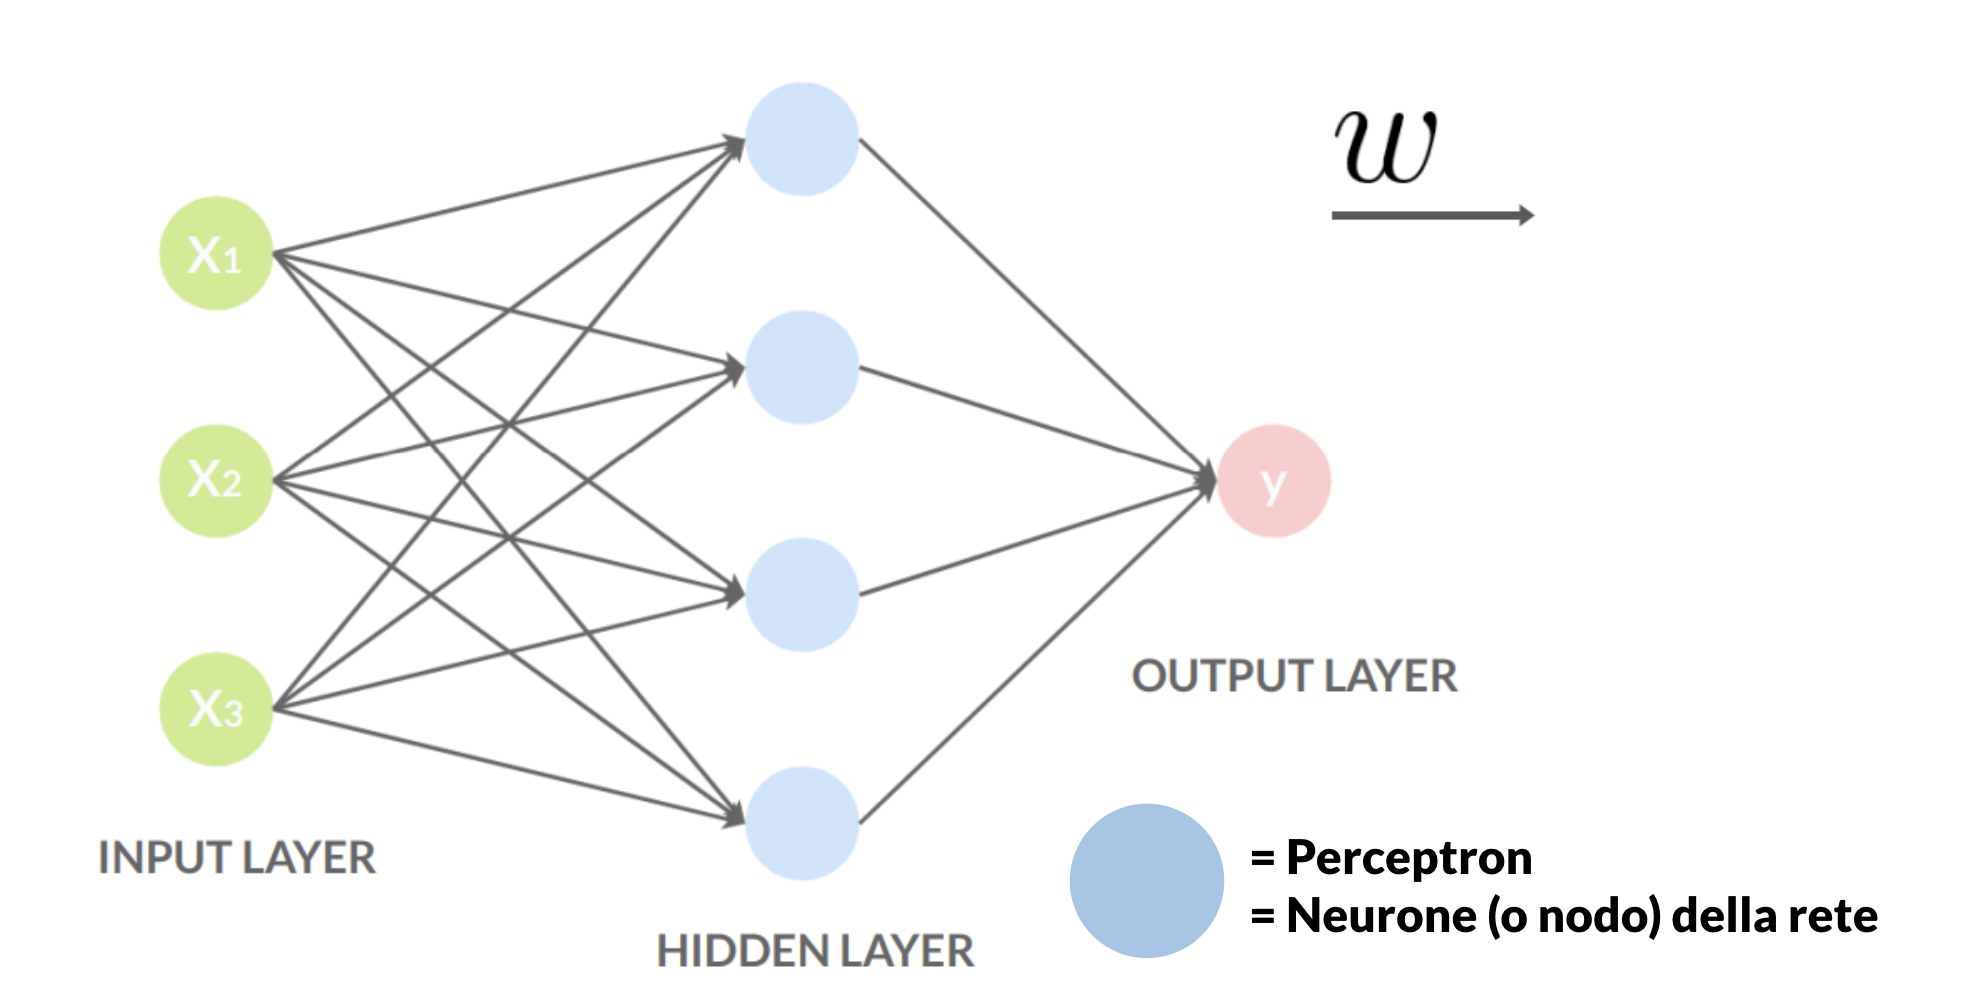


ogni pallino è un nodo, ogni freccetta un peso

la rete usa le feature derivanti dallo strado precedente per trovare nuove feature piu significative, viene automatizzata nelle ANN

il numero di nodi e il numero di strati nascosti sono iperparametri da determinare

più ne vengono inseriti piu il modello tende all'overfitting

si usa la relu negli strati nascosti

per output si usa:
- problemi di classificazione binaria: Sigmoide
- classificazione multiclasse: softmax
- regressione: lineare

**VANTAGGI**
- apprende relazioni , anche molto complesse, nei dati
- può migliorare all'aumentare dei dati

**SVANTAGGI**
- servono molti dati (da 5k in su)
- molte risorse di calcolo
- molti iperparametri
- più è complessa la rete più è complessa da interpretare, non adatti a problemi in cui serve alta interpretabilità dei risultati

## Addestramento di deep neural Network

avviene con algoritmi di ottimizzazione

**Perceptron**

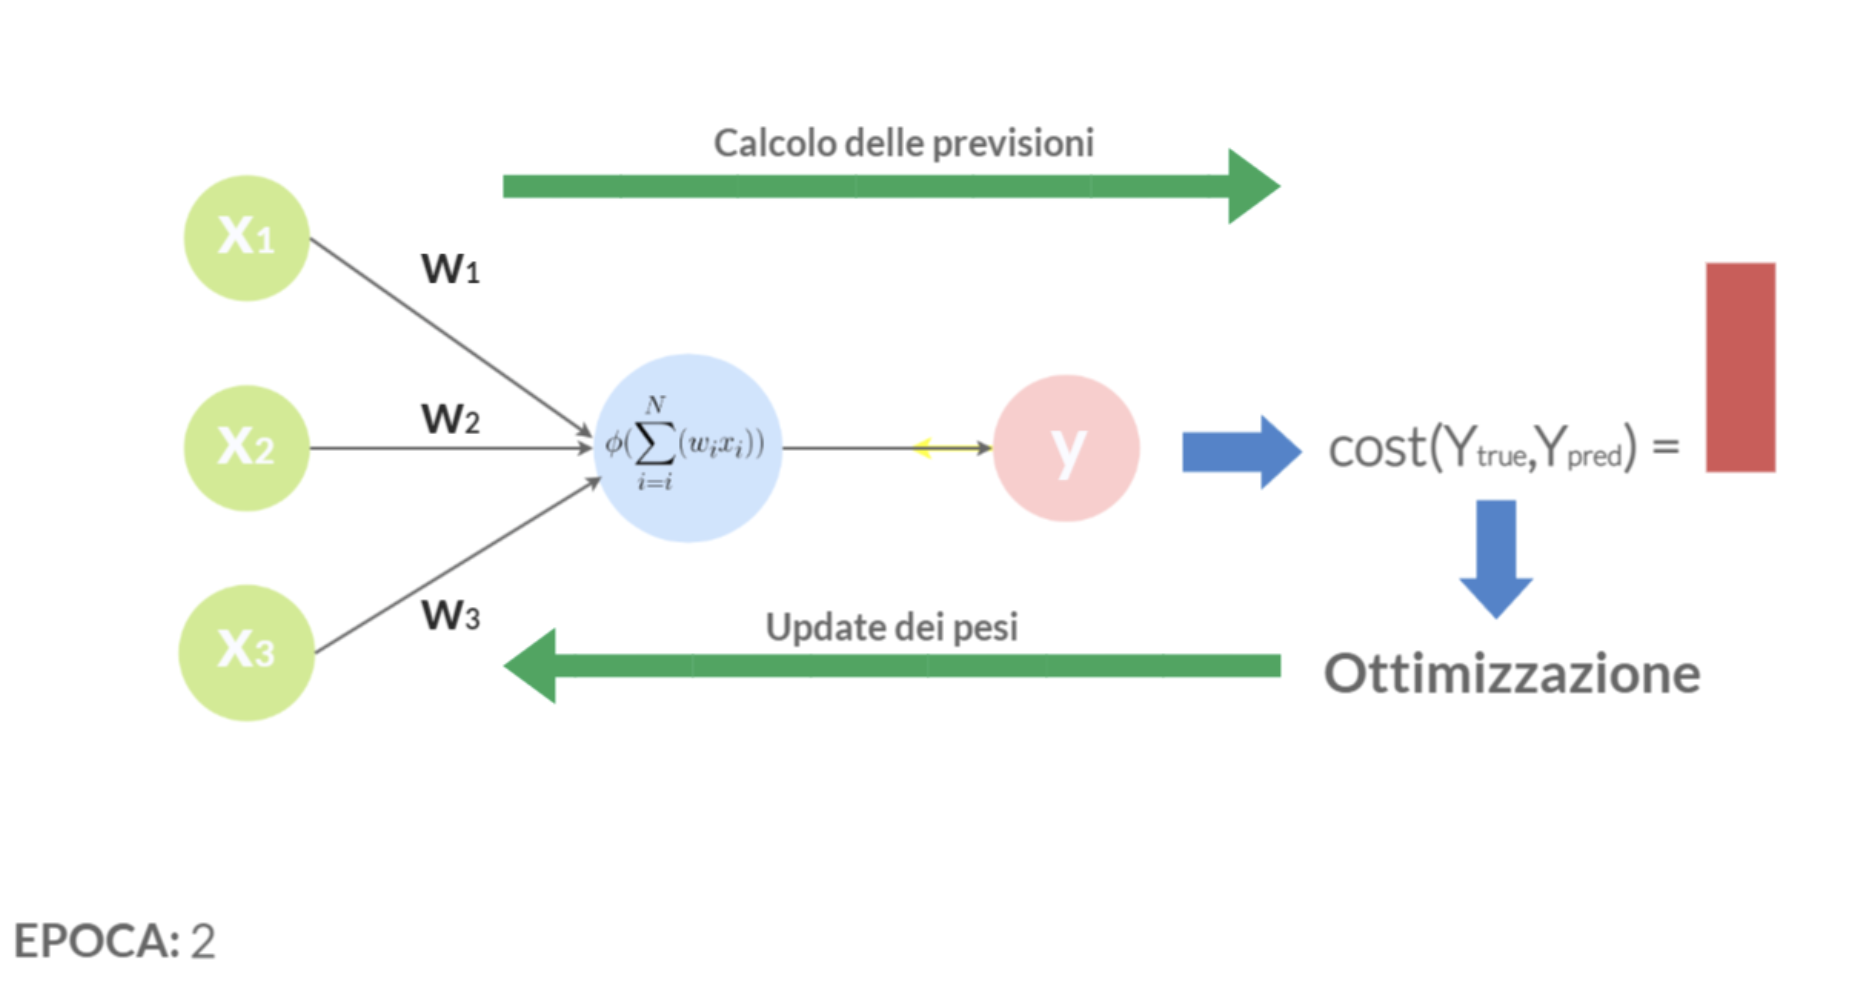

addestramento tramite gradient descent, ciclico <br>


eseguo il processo fino ai punti di minimo della funzione di costo

**rete neurale profonda**

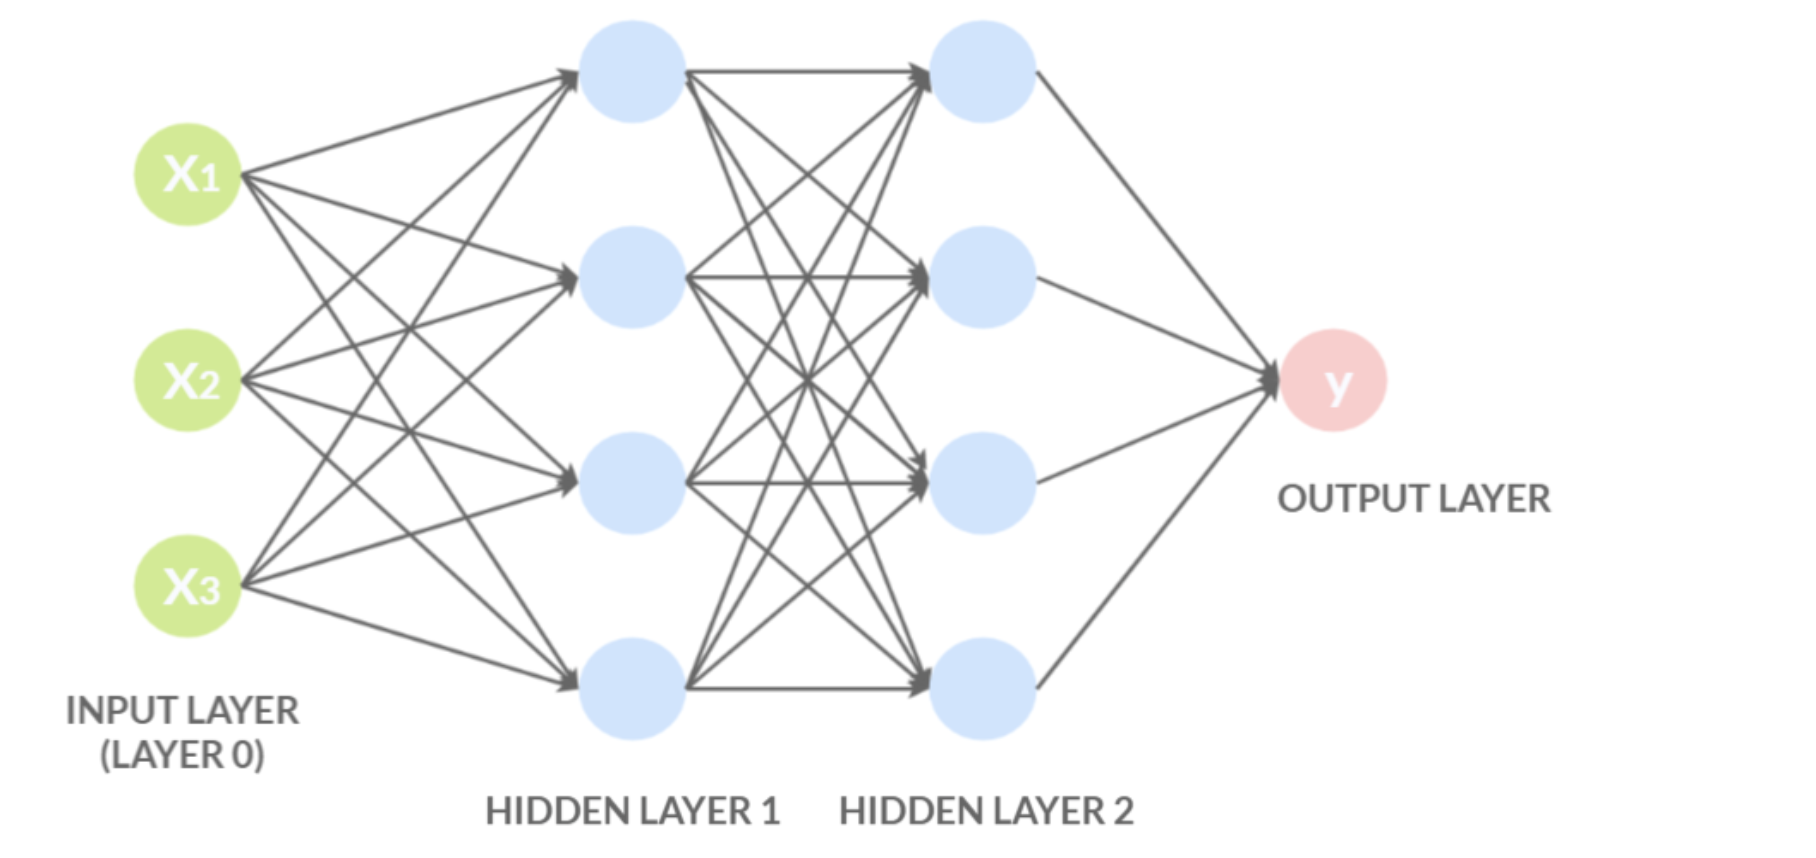

quanto ogni peso influenza errore di una rete? questa dinamica è difficile negli strati intermedi (nascosti)

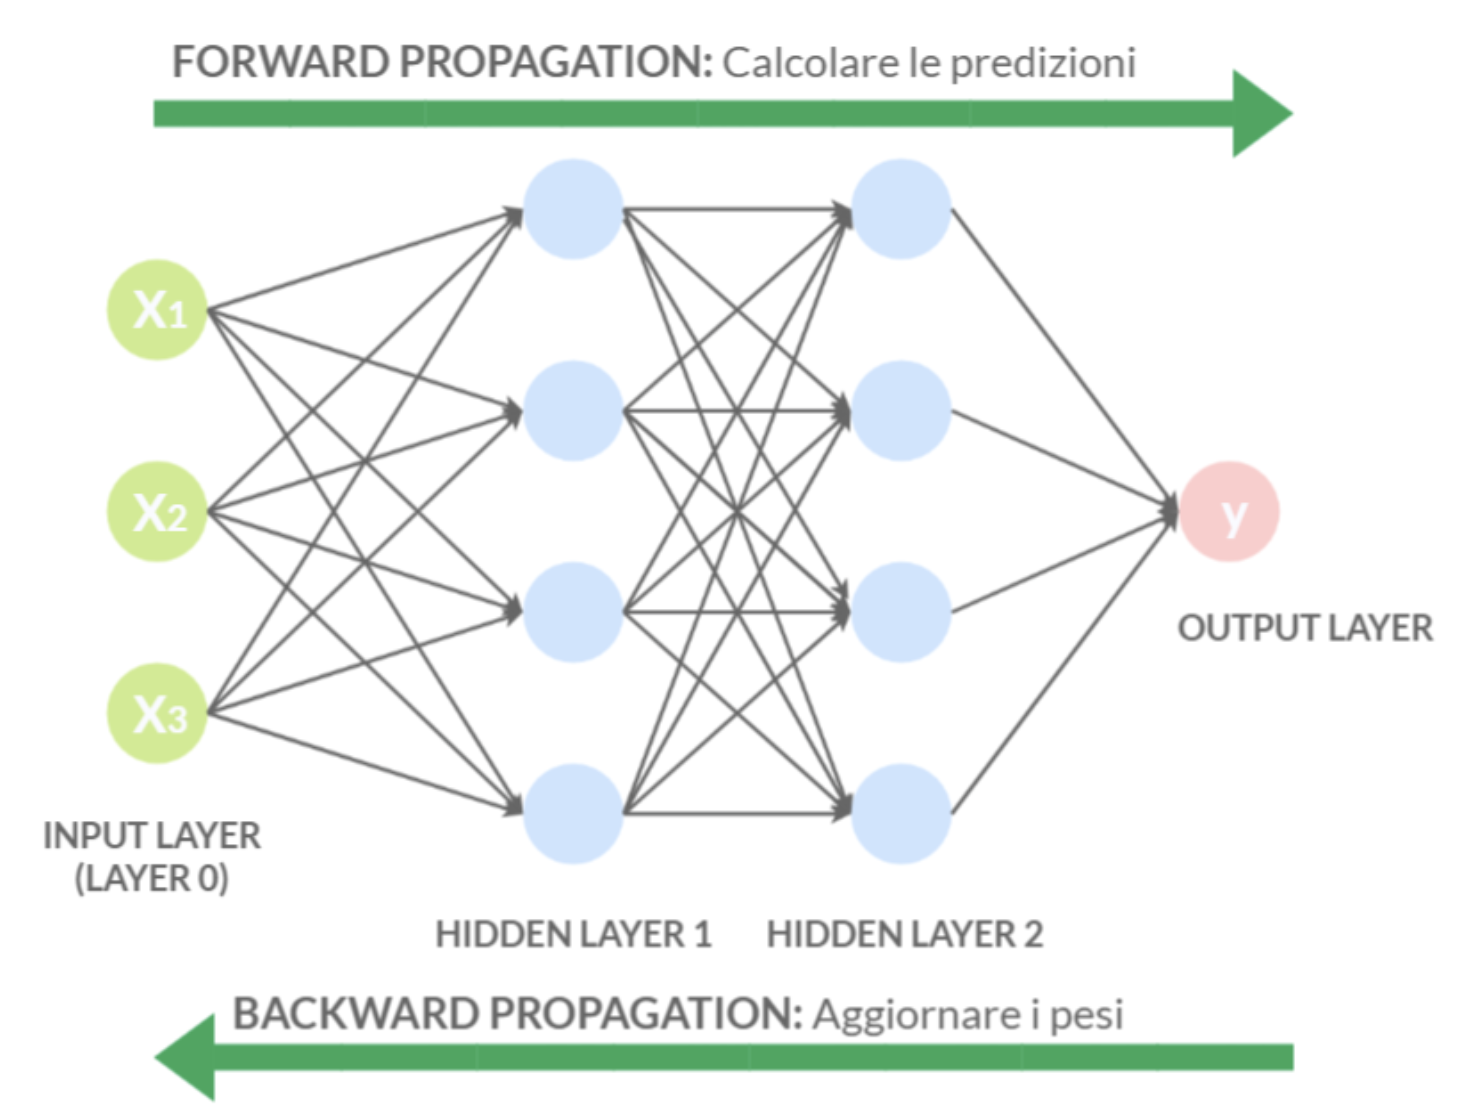

segnale propagato in avanti e poi ripropagato indietro per comprendere quanto ognuno dei pesi ha influito su errore della rete

## Universal approximation theorem

afferma che un MLP con un singolo strato nascosto e un numero sufficiente di nodi e neuroni, può approssimare qualsiasi funzione continua con qualsiasi grado di precisione

funziona solo se:
- funzione da approssimare è continua
- la funzione di attivazione è corretta per la distribuzione sottostante

la teoria dice che il teorema si applica solo ad un MLP con un solo strato nascosto, la pratica ha mostrato il contrario

# Pratica

## creiamo i dataset

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
from viz import plot_decision_boundary

In [5]:
RANDOM_SEED = 0 

In [6]:
from sklearn.datasets import make_moons

In [7]:
X,y = make_moons(
    n_samples=100,
    noise=.25,
    shuffle=True, 
    random_state=RANDOM_SEED
)

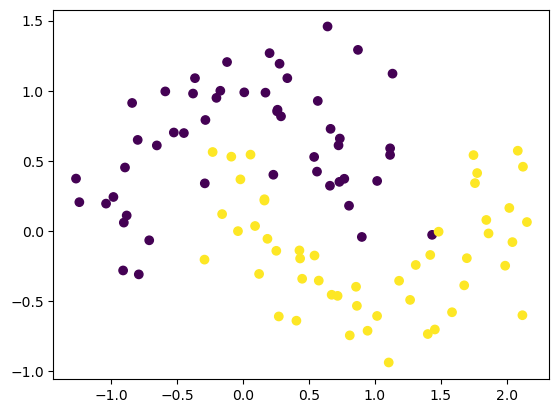

In [8]:
plt.scatter(X[:,0], X[:,1], c=y)

## Processing

In [9]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=RANDOM_SEED)
X_train.shape

(80, 2)

In [10]:
X_test.shape

(20, 2)

In [11]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [12]:
X_train.min()

0.0

In [13]:
X_train.max()

1.0

## Baseline model

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
perc = Perceptron()
perc.fit(X_train, y_train)

Perceptron()

In [16]:
perc.score(X_test, y_test)

0.85

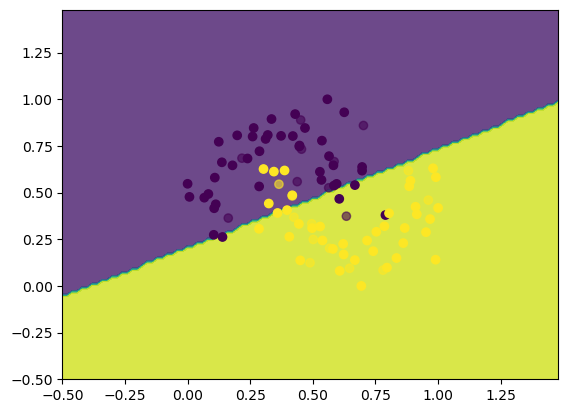

In [17]:
plot_decision_boundary(perc, (X_train, y_train), (X_test, y_test))

## regressione logistica

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.85

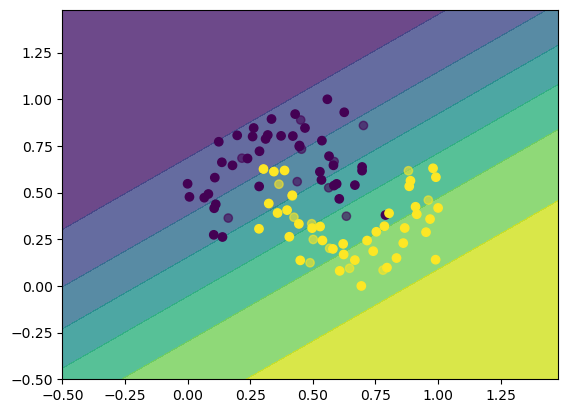

In [20]:
plot_decision_boundary(lr, (X_train, y_train), (X_test, y_test))

## Multilayer perceptron

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,), random_state=RANDOM_SEED)
mlp.fit(X_train,y_train)
mlp.score(X_test,y_test)


/Users/adanfindo/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9

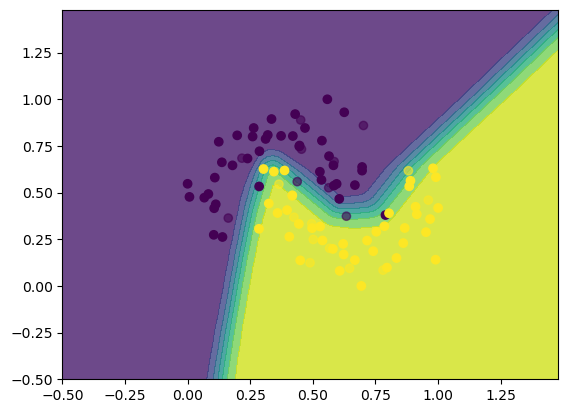

In [24]:
plot_decision_boundary(mlp, (X_train, y_train), (X_test, y_test))

## Esplorare la rete

visualizziamo i pesi di ogni strato

In [26]:
len(mlp.coefs_)

4

## A che serve la funzione di attivazione?

In [32]:
hidden_layer_size = (100,)*10
mlp_no_act = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation='identity', random_state=RANDOM_SEED)
mlp_no_act.fit(X_train, y_train)
mlp_no_act.score(X_test, y_test)

0.85

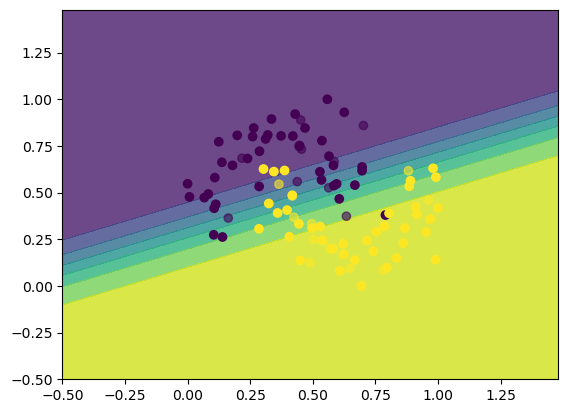

In [33]:
plot_decision_boundary(mlp_no_act, (X_train, y_train), (X_test, y_test))

senza la funzione di attivazione perdo ogni possibilità di identificare relazioni non lineari all'interno dei dati

# Esercitazione

## Classificazione di cifre scritte a mano
In questa esercitazione dovrai addestrare un modello di rete neurale artificiale in grado di riconoscere cifre scritte a mano. <br/>
Puoi scaricare il dataset da utilizzare dall'[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits). I file sono [optdigits.tra](https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra) per il train set e [optdigits.tes](https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes) per il test set.
Riesci a comprendere il formato di questi file? Ma certo! Dopo averlo fatto, utilizzali per addestrare un multilayer perceptron, questo modello era effettivamente la scelta migliore?

In [34]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes

--2025-08-21 10:11:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: non specificato
Salvataggio in: «optdigits.tra»

optdigits.tra           [   <=>              ] 550,43K   598KB/s    in 0,9s    

2025-08-21 10:11:27 (598 KB/s) - «optdigits.tra» salvato [563639]

--2025-08-21 10:11:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: non specificato
Salvataggio in: «optdigits.tes»

optdigits.tes           [   <=>              ] 258,51K   352KB/s    in 0,7s   

## importiamo i moduli

In [37]:
from sklearn.neural_network import MLPClassifier
from numpy import genfromtxt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

il file contiene il valore in termini di intensità del pixel che compongono immagine, ultimo numero è la classe di appartenenza (da 0 a 9). E' stato eseguito il flattening delle immagine su un unica riga

In [39]:
arr = genfromtxt("optdigits.tra", delimiter=",")
arr.shape

(3823, 65)

stampiamo con imshow il 100 esempio, solo il valore di classe (-1) ovvero l'ultimo e lo ri arrangiamo in matrice 8x8

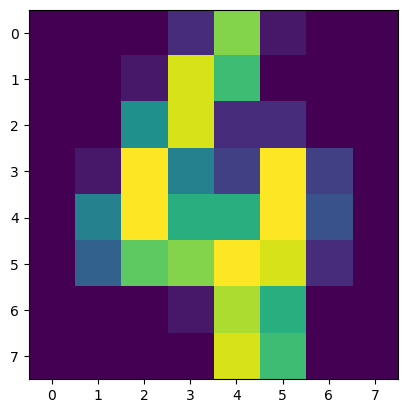

In [ ]:
sample_n = 100
plt.imshow(arr[sample_n,:-1].reshape(8,8))

In [41]:
print(arr[sample_n,-1])

4.0


## Processiamo i dati

otteniamo feature e target

In [42]:
X  = arr[:,:-1]
y = arr[:,-1]

In [43]:
X.shape

(3823, 64)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state= RANDOM_SEED)


normalizziamo i dati

In [46]:
X_max = X_train.max()
X_train /= X_max
X_test /= X_max

## Multilayer perceptron

In [47]:
mlp = MLPClassifier(random_state=RANDOM_SEED)
mlp.fit(X_train, y_train)

/Users/adanfindo/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [48]:
mlp.score(X_test, y_test)

0.9764705882352941

In [49]:
from sklearn.metrics import classification_report
y_pred = mlp.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        79
         1.0       1.00      0.95      0.97        80
         2.0       0.99      1.00      0.99        75
         3.0       1.00      0.96      0.98        78
         4.0       0.97      0.99      0.98        71
         5.0       0.96      1.00      0.98        68
         6.0       0.99      0.94      0.96        80
         7.0       1.00      1.00      1.00        75
         8.0       0.95      0.97      0.96        78
         9.0       0.94      0.96      0.95        81

    accuracy                           0.98       765
   macro avg       0.98      0.98      0.98       765
weighted avg       0.98      0.98      0.98       765



## visualizziamo gli errori

In [52]:
error_mask = y_pred != y_test
error_mask.sum()

18

In [53]:
X_err = X_test[error_mask]
y_err = y_test[error_mask]
y_err_pred = y_pred[error_mask]

In [55]:
X_err.shape

(18, 64)

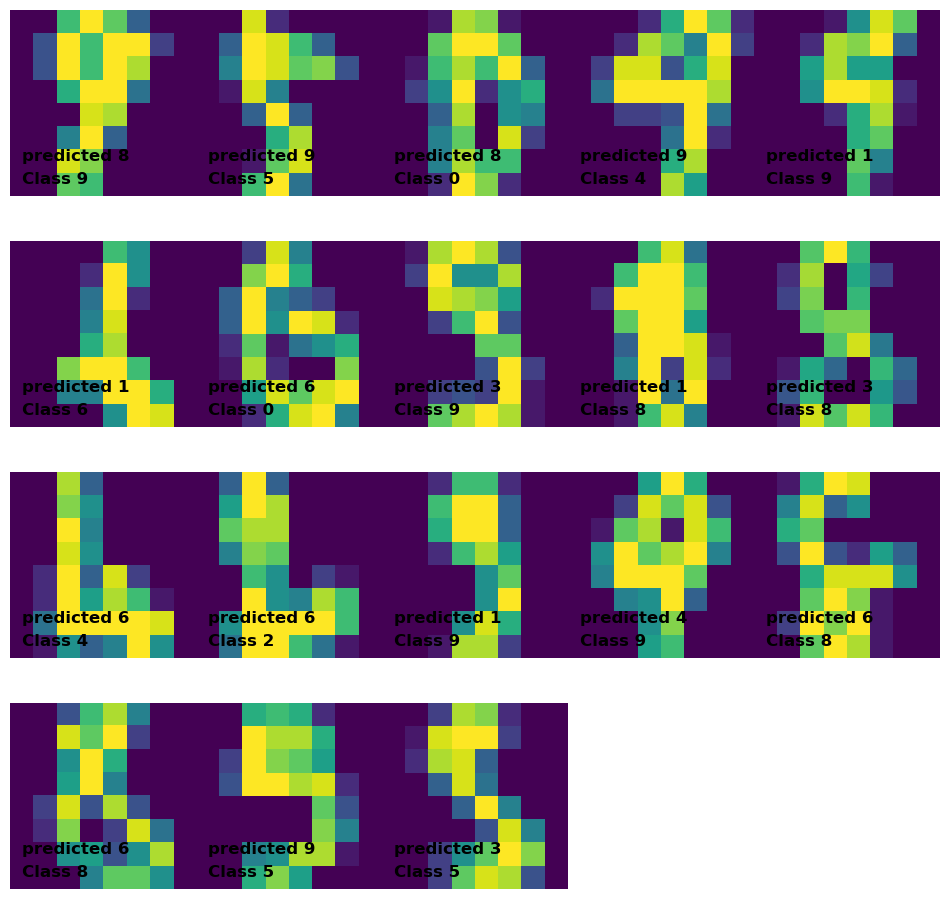

In [67]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(X_err.shape[0]):
    plot = fig.add_subplot(4, 5, i+1)
    plt.imshow(X_err[i,:].reshape(8,8))
    plt.text(0,7, f"Class {int(y_err[i])}", fontsize = 12, fontdict={"weight": "bold"})
    plt.text(0,6, f"predicted {int(y_err_pred[i])}",fontsize = 12, fontdict={"weight": "bold"})
    plt.axis('off')
    


## E' stata la scelta migliore? (per deciderlo devo fare un baseline piu semplice)

In [68]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/adanfindo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9699346405228758